<a href="https://colab.research.google.com/github/proygit/DMT/blob/main/DMT_Assgnt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change directories and load sample data

In [1]:
!ls /content


sample_data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/dmt-data

DMT.csv  ODI-2023.xlsx


In [4]:
import os


# Change the working directory to the desired folder
os.chdir('/content/drive/MyDrive/dmt-data')

# List the contents of the current working directory
contents = os.listdir()

# Print the contents
print(contents)



['ODI-2023.xlsx', 'DMT.csv']


# EDA with excel

In [5]:
import pandas as pd

# Read in the Excel file
data_df = pd.read_excel('ODI-2023.xlsx')

# Create a copy of the DataFrame
df_cp = data_df.copy()

# Get the shape of the DataFrame
print(df_cp.shape)



(305, 17)


In [ ]:

df_cp.head(20)


# Explore Colums

In [ ]:
df_cp.columns


In [ ]:
df_cp.dtypes


In [ ]:
df_cp.describe()

In [10]:
# check null and isNaN values if any
print(df_cp.columns.isna().sum())
print(df_cp.columns.isnull().sum())

0
0


In [ ]:
df_cp.to_csv('DMT.csv',index =False, sep=',', header=True)
# Print the first few rows of the DataFrame
df_csv = pd.read_csv('DMT.csv')
#print(df_csv.columns)
print(df_csv[['What is your gender?']].head(2))



#check original rows of data comment the ones not important and convert object type to specific data types

In [12]:
print(df_cp.shape)
# original data set has 305 rows and 17 colums


(305, 17)


In [ ]:
print(df_cp.columns)

In [14]:
df_csv_ver1 =df_csv[[#'Tijdstempel', 
        #'What programme are you in?',
       #'Have you taken a course on machine learning?',
       #'Have you taken a course on information retrieval?',
       #'Have you taken a course on statistics?',
       #'Have you taken a course on databases?', 
        'What is your gender?',
       'I have used ChatGPT to help me with some of my study assignments ',
      # 'When is your birthday (date)?',
       #'How many students do you estimate there are in the room?',
       #'Did you stand up to come to your previous answer    ?',
       #'What is your stress level (0-100)?',
       #'How many hours per week do you do sports (in whole hours)? ',
       #'Give a random number', 
        #'Time you went to bed Yesterday',
       #'What makes a good day for you (1)?',
       #'What makes a good day for you (2)?'
       ]].iloc[:, :17]

In [ ]:
df_csv_ver1

#Drop Rows which are not Male or Female

In [ ]:
#Original count of rows and columns are - 305 row and 2 columns
df_csv_ver1.shape
#check values of Gender if there are Male or Female or anything else
df_csv_ver1['What is your gender?'].value_counts()
# if the values are not male or female convert them to NaN
mask = ~ df_csv_ver1['What is your gender?'].isin(['male', 'female'])
df_csv_ver1['What is your gender?'].value_counts()
df_csv_ver1


In [ ]:
import numpy as np
df_csv_ver1.loc[mask, 'What is your gender?'] = np.nan
df_csv_ver1['What is your gender?'].value_counts()
df_csv_ver1
# drop the NaN row values 
df_csv_ver1.dropna(inplace=True)
df_csv_ver1


# Plot a graph with the above value

In [18]:
import matplotlib.pyplot as plt
df_csv_ver1['What is your gender?'].value_counts()


male      154
female    134
Name: What is your gender?, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_csv_ver1.shape
df_csv_ver1
#Convert categorial to numeric values
le = LabelEncoder()
df_csv_ver1['What is your gender?'] = le.fit_transform(df_csv_ver1['What is your gender?'])
#df_csv_ver1['I have used ChatGPT to help me with some of my study assignments '] = le.fit_transform(df_csv_ver1['I have used ChatGPT to help me with some of my study assignments '])
# Rename the column since its too long 
df_csv_ver1 = df_csv_ver1.rename(columns={'I have used ChatGPT to help me with some of my study assignments ': 'Used ChatGPT?'})

df_csv_ver1



In [ ]:

# group the data by gender and the 3 types of answers
df_grouped = df_csv_ver1.groupby(['What is your gender?', 'Used ChatGPT?']).size().reset_index(name='Count')
# create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
df_grouped.pivot(index='What is your gender?', columns='Used ChatGPT?', values='Count').plot(kind='bar', ax=ax)

# set the title and axis labels
ax.set_title('Counts of Male and Female Responses by Answer Type')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Add a legend with the new labels
# add legends
# add labels for the answers
handles, labels = ax.get_legend_handles_labels()
labels[0:3] = ['No', 'Yes (for some assignments)', 'Yes (for most assignments)']
ax.legend(handles, labels, loc='upper right')
ax.legend(['Male', 'Female'], loc='upper left')
# show the plot
plt.show()

In [ ]:
from matplotlib import pyplot as plt

# filter the data frame by gender
df_male = df_csv_ver1[df_csv_ver1['What is your gender?'] == 1]
df_female = df_csv_ver1[df_csv_ver1['What is your gender?'] == 0]

# plot histograms for male and female answers
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axs[0].hist(df_male['Used ChatGPT?'], bins=10)
axs[0].set_title('Male Answers')
axs[0].set_xlabel('Answer Type')
axs[0].set_ylabel('Count')

axs[1].hist(df_female['Used ChatGPT?'], bins=10)
axs[1].set_title('Female Answers')
axs[1].set_xlabel('Answer Type')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:

# group the data by gender and the 3 types of answers
df_grouped = df_csv_ver1.groupby(['What is your gender?', 'Used ChatGPT?']).size().reset_index(name='Count')

# create a histogram for male and female answers
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
df_grouped[df_grouped['What is your gender?'] == 0].hist(column='Count', by='Used ChatGPT?', ax=ax[0], bins=5)
df_grouped[df_grouped['What is your gender?'] == 1].hist(column='Count', by='Used ChatGPT?', ax=ax[1], bins=5)

# set the title and axis labels
fig.suptitle('Counts of Male and Female Responses by Answer Type')
ax[1].set_xlabel('Count')

# Add a legend with the new labels
handles, labels = ax[1].get_legend_handles_labels()
labels[0:3] = ['No', 'Yes (for some assignments)', 'Yes (for most assignments)']
ax[1].legend(handles, labels, loc='upper right')

plt.show()

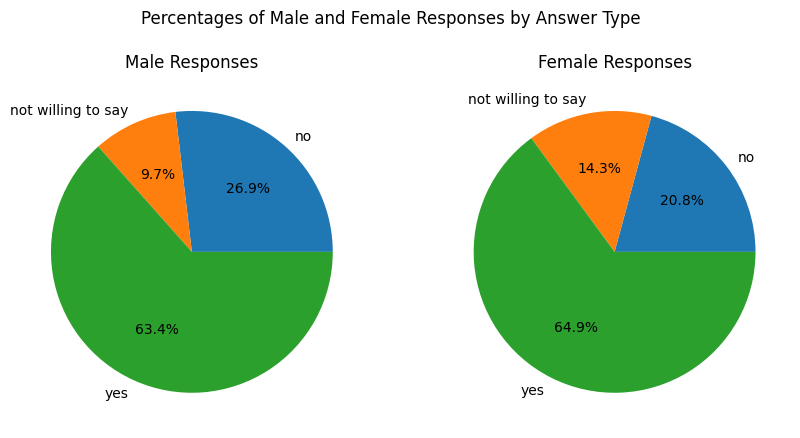

In [23]:

# group the data by gender and the 3 types of answers
df_grouped = df_csv_ver1.groupby(['What is your gender?', 'Used ChatGPT?']).size().reset_index(name='Count')

# create a pie chart for male and female answers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

df_male = df_grouped[df_grouped['What is your gender?'] == 0]
df_female = df_grouped[df_grouped['What is your gender?'] == 1]

ax[0].pie(df_male['Count'], labels=df_male['Used ChatGPT?'], colors=colors, autopct='%1.1f%%')
ax[0].set_title('Male Responses')

ax[1].pie(df_female['Count'], labels=df_female['Used ChatGPT?'], colors=colors, autopct='%1.1f%%')
ax[1].set_title('Female Responses')

fig.suptitle('Percentages of Male and Female Responses by Answer Type')

plt.show()
